# Install packages

In [ ]:
!pip install yfinance
!pip install statsmodels==0.13.5
!pip install pytest --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports and Constants

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# To fetch financial data
import yfinance as yf

from google.colab import files

from sklearn import preprocessing

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

import seaborn as sns
from scipy import signal
import scipy.fft
import statsmodels.api as sm
import copy
import scipy.stats as stats

In [ ]:
from pandas.core import indexes
# Covid
covid_start = "2019-08-24"
covid_mid = "2020-02-25"
covid_end = "2020-08-24"

# Russian-Ukarine War
war_start = "2021-07-10"
war_mid = "2022-01-10"
war_end = "2022-07-10"

# STOCK and INDEXS
stocks = [
    "META",
    "AAPL",
    "MSFT",
    "GOOG",
    "IBM",
    "CVS",
    "JNJ",
    "UNH",
    "TMO",
    "REGN",
    "V",
    "JPM",
    "BAC",
    "PYPL",
    "MA",
    "DLR",
    "AMT",
    "PLD",
    "SPG",
    "BXP",
    "XOM",
    "SHEL",
    "CVX",
    "COP",
    "HAL",
    "DD",
    "CE",
    "SHW",
    "APD",
    "EMN",
    "SBUX",
    "AMC",
    "BBY",
    "HD",
    "NKE",
    "HON",
    "MMM",
    "SWK",
    "DAL",
    "BA"
]

indexes = [
   '^DJI',
   '^GSPC',
   '^IXIC',
   "^FTSE",
   "^FCHI",
   "^GDAXI",
]


# ForEX Data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


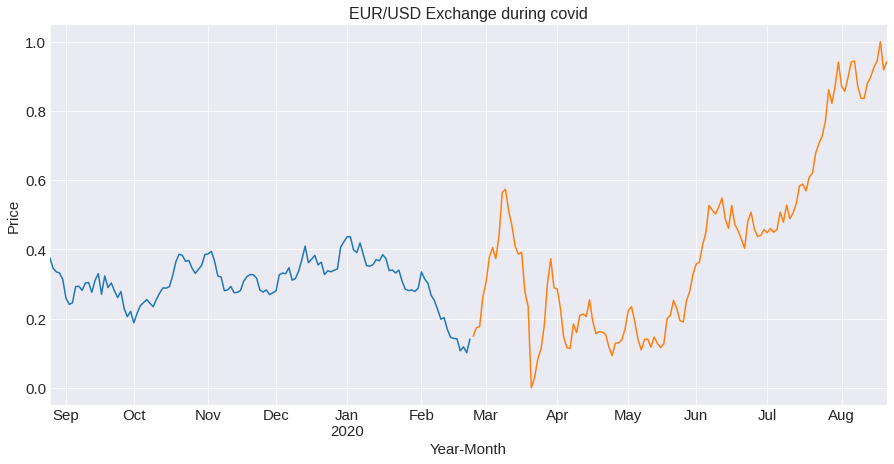

In [ ]:
# Covid EUR/USD data 
forex_data_covid = yf.download('EURUSD=X', start=covid_start, end=covid_end)
forex_data_covid1 = yf.download('EURUSD=X', start=covid_start, end=covid_mid)
forex_data_covid2 = yf.download('EURUSD=X', start=covid_mid, end=covid_end)

# Set the index to a datetime object
forex_data_covid1.index = pd.to_datetime(forex_data_covid1.index)
forex_data_covid2.index = pd.to_datetime(forex_data_covid2.index)

# scale
scaler = preprocessing.MinMaxScaler()
scaler.fit(forex_data_covid[forex_data_covid.columns])
forex_data_covid1[forex_data_covid1.columns] = scaler.transform(forex_data_covid1[forex_data_covid1.columns])
forex_data_covid2[forex_data_covid2.columns] = scaler.transform(forex_data_covid2[forex_data_covid2.columns])

# Plot the close price
plt.figure(figsize=(15, 7))
forex_data_covid1['Adj Close'].plot()
forex_data_covid2['Adj Close'].plot()

# Set the title and axis label
plt.title('EUR/USD Exchange during covid', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


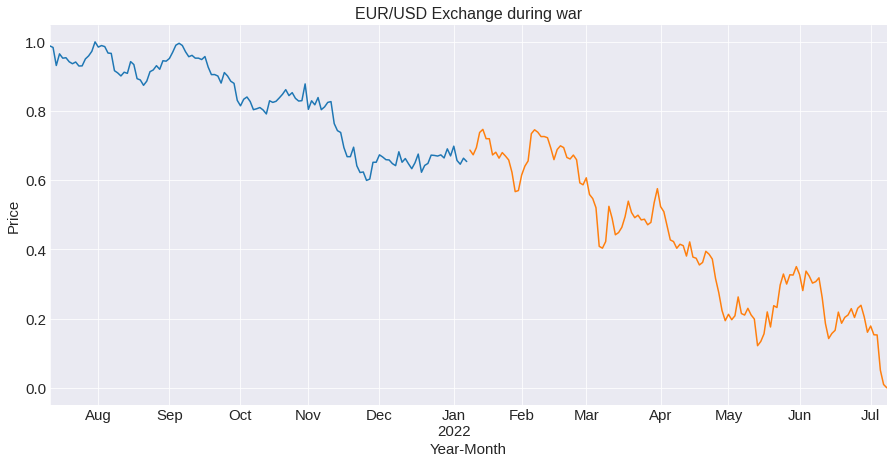

In [ ]:
# War EUR/USD data 
forex_data_war = yf.download('EURUSD=X', start=war_start, end=war_end)
forex_data_war1 = yf.download('EURUSD=X', start=war_start, end=war_mid)
forex_data_war2 = yf.download('EURUSD=X', start=war_mid, end=war_end)

# Set the index to a datetime object
forex_data_war.index = pd.to_datetime(forex_data_war.index)
forex_data_war1.index = pd.to_datetime(forex_data_war1.index)
forex_data_war2.index = pd.to_datetime(forex_data_war2.index)

#scale
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(forex_data_war[forex_data_war.columns])
forex_data_war1[forex_data_war1.columns] = scaler.transform(forex_data_war1[forex_data_war1.columns])
forex_data_war2[forex_data_war2.columns] = scaler.transform(forex_data_war2[forex_data_war2.columns])


# Plot the close price
plt.figure(figsize=(15, 7))
forex_data_war1['Adj Close'].plot()
forex_data_war2['Adj Close'].plot()

# Set the title and axis label
plt.title('EUR/USD Exchange during war', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

# Company Stock Data

In [ ]:
# Covid Stock data 
stocks_data_covid = yf.download(stocks, start=covid_start, end=covid_end, progress=False)
stocks_data_covid1 = yf.download(stocks, start=covid_start, end=covid_mid, progress=False)
stocks_data_covid2 = yf.download(stocks, start=covid_mid, end=covid_end, progress=False)

stocks_data_covid1.index = pd.to_datetime(stocks_data_covid1.index)
stocks_data_covid2.index = pd.to_datetime(stocks_data_covid2.index)

# scale
scaler = preprocessing.MinMaxScaler()
scaler.fit(stocks_data_covid[stocks_data_covid.columns])
stocks_data_covid1[stocks_data_covid1.columns] = scaler.transform(stocks_data_covid1[stocks_data_covid1.columns])
stocks_data_covid2[stocks_data_covid2.columns] = scaler.transform(stocks_data_covid2[stocks_data_covid2.columns])

stocks_data_covid2.tail()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Adj Close                                                    \
                AAPL       AMC       AMT       APD        BA       BAC   
Date                                                                     
2020-08-17  0.867773  0.369552  0.782470  0.950791  0.267956  0.461556   
2020-08-18  0.880708  0.343305  0.799975  0.924243  0.261762  0.440062   
2020-08-19  0.882672  0.347505  0.721844  0.929205  0.258421  0.438319   
2020-08-20  0.917447  0.379000  0.747994  0.921927  0.259500  0.415082   
2020-08-21  1.000000  0.326507  0.765713  0.924987  0.252262  0.408111   

                                                    ...    Volume            \
                 BBY       BXP        CE       COP  ...      REGN      SBUX   
Date                                                ...                       
2020-08-17  0.949569  0.174795  0.638298  0.435052  ...  0.023849  0.130469   
2020-08-18  0.945328  0.165842  0.631690  0.426342  ...  0.021757  0.127212   
2020-08-19  0.967951  0.145094  0.630789  0.410334  ...  0.065272  0.185449   
2020-08-20  0.963866  0.160726  0.626282  0.389619  ...  0.056891  0.120779   
2020-08-21  1.000000  0.146373  0.624029  0.375259  ...  0.057623  0.139150   

                                                                        \
                SHEL       SHW       SPG       SWK       TMO       UNH   
Date                                                                     
2020-08-17  0.143820  0.130742  0.172679  0.115322  0.154608  0.148962   
2020-08-18  0.266029  0.104986  0.337637  0.173394  0.115043  0.130690   
2020-08-19  0.132380  0.116032  0.195598  0.096349  0.155511  0.097887   
2020-08-20  0.176384  0.117466  0.162942  0.135226  0.092249  0.110833   
2020-08-21  0.174029  0.137061  0.109844  0.089767  0.170455  0.128410   

                                
                   V       XOM  
Date                            
2020-08-17  0.137352  0.152482  
2020-08-18  0.146795  0.119014  
2020-08-19  0.252360  0.138235  
2020-08-20  0.230214  0.154114  
2020-08-21  0.271366  0.283727  

[5 rows x 240 columns]

In [ ]:
# War Stock data 
stocks_data_war = yf.download(stocks, start=war_start, end=war_end, progress=False)
stocks_data_war1 = yf.download(stocks, start=war_start, end=war_mid, progress=False)
stocks_data_war2 = yf.download(stocks, start=war_mid, end=war_end, progress=False)

stocks_data_war1.index = pd.to_datetime(stocks_data_war1.index)
stocks_data_war2.index = pd.to_datetime(stocks_data_war2.index)

# scale
scaler = preprocessing.MinMaxScaler()
scaler.fit(stocks_data_war[stocks_data_war.columns])
stocks_data_war1[stocks_data_war1.columns] = scaler.transform(stocks_data_war1[stocks_data_war1.columns])
stocks_data_war2[stocks_data_war2.columns] = scaler.transform(stocks_data_war2[stocks_data_war2.columns])


stocks_data_war2.tail()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Adj Close                                                    \
                AAPL       AMC       AMT       APD        BA       BAC   
Date                                                                     
2022-07-01  0.172394  0.076476  0.473398  0.293092  0.193966  0.032442   
2022-07-05  0.223510  0.058325  0.440135  0.263270  0.176656  0.014543   
2022-07-06  0.249943  0.053243  0.471099  0.233769  0.165413  0.000000   
2022-07-07  0.316608  0.099468  0.456901  0.218751  0.195017  0.049222   
2022-07-08  0.330018  0.103824  0.427560  0.180025  0.187738  0.045306   

                                                    ...    Volume            \
                 BBY       BXP        CE       COP  ...      REGN      SBUX   
Date                                                ...                       
2022-07-01  0.022892  0.070543  0.046106  0.565320  ...  0.049058  0.169288   
2022-07-05  0.069402  0.083714  0.000845  0.475801  ...  0.168362  0.189399   
2022-07-06  0.048248  0.057137  0.007600  0.457445  ...  0.133991  0.063475   
2022-07-07  0.082587  0.070308  0.034115  0.499946  ...  0.133450  0.090705   
2022-07-08  0.086644  0.036441  0.000000  0.501499  ...  0.168783  0.036872   

                                                                        \
                SHEL       SHW       SPG       SWK       TMO       UNH   
Date                                                                     
2022-07-01  0.265201  0.409697  0.165170  0.111607  0.064102  0.078371   
2022-07-05  0.547381  0.417369  0.207200  0.243280  0.023266  0.119737   
2022-07-06  0.455660  0.305790  0.100809  0.195140  0.145373  0.083866   
2022-07-07  0.323784  0.242893  0.094908  0.149580  0.150225  0.075544   
2022-07-08  0.150973  0.111449  0.104502  0.185762  0.046637  0.124025   

                                
                   V       XOM  
Date                            
2022-07-01  0.025847  0.240461  
2022-07-05  0.025233  0.377633  
2022-07-06  0.025261  0.357457  
2022-07-07  0.040607  0.198786  
2022-07-08  0.011341  0.096800  

[5 rows x 240 columns]

# Indexes Data

In [ ]:
index_data_covid = yf.download(indexes, start=covid_start, end=covid_end, progress=False)
index_data_covid1 = yf.download(indexes, start=covid_start, end=covid_mid, progress=False)
index_data_covid2 = yf.download(indexes, start=covid_mid, end=covid_end, progress=False)

index_data_covid1.index = pd.to_datetime(index_data_covid1.index)
index_data_covid2.index = pd.to_datetime(index_data_covid2.index)

# scale
scaler = preprocessing.MinMaxScaler()
scaler.fit(index_data_covid[index_data_covid.columns])
index_data_covid1[index_data_covid1.columns] = scaler.transform(index_data_covid1[index_data_covid1.columns])
index_data_covid2[index_data_covid2.columns] = scaler.transform(index_data_covid2[index_data_covid2.columns])

index_data_covid2.tail()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Adj Close                                                    \
                ^DJI     ^FCHI     ^FTSE    ^GDAXI     ^GSPC     ^IXIC   
Date                                                                     
2020-08-17  0.844289  0.516508  0.422837  0.837611  0.986920  0.959096   
2020-08-18  0.838191  0.502130  0.403887  0.830336  0.993637  0.977318   
2020-08-19  0.830417  0.518753  0.417093  0.848209  0.980763  0.962854   
2020-08-20  0.834692  0.490749  0.380274  0.820657  0.989955  0.989475   
2020-08-21  0.852083  0.484421  0.376021  0.808464  1.000000  1.000000   

               Close                                ...      Open            \
                ^DJI     ^FCHI     ^FTSE    ^GDAXI  ...     ^FTSE    ^GDAXI   
Date                                                ...                       
2020-08-17  0.844289  0.516508  0.422837  0.837611  ...  0.408886  0.839053   
2020-08-18  0.838191  0.502130  0.403887  0.830336  ...  0.422837  0.822379   
2020-08-19  0.830417  0.518753  0.417093  0.848209  ...  0.403887  0.822713   
2020-08-20  0.834692  0.490749  0.380274  0.820657  ...  0.417093  0.820962   
2020-08-21  0.852083  0.484421  0.376021  0.808464  ...  0.380274  0.830446   

                                  Volume                                \
               ^GSPC     ^IXIC      ^DJI     ^FCHI     ^FTSE    ^GDAXI   
Date                                                                     
2020-08-17  0.989426  0.960285  0.241866  0.109802  0.131107  0.036133   
2020-08-18  0.995035  0.980121  0.228984  0.133791  0.131910  0.070454   
2020-08-19  1.000000  0.990107  0.271510  0.113278  0.099742  0.059061   
2020-08-20  0.970929  0.963266  0.263183  0.150350  0.133131  0.064924   
2020-08-21  0.994101  1.000000  0.345332  0.168391  0.149815  0.113000   

                                
               ^GSPC     ^IXIC  
Date                            
2020-08-17  0.278933  0.349546  
2020-08-18  0.305903  0.351726  
2020-08-19  0.307183  0.394283  
2020-08-20  0.275157  0.508447  
2020-08-21  0.284693  0.463039  

[5 rows x 36 columns]

In [ ]:
index_data_war = yf.download(indexes, start=war_start, end=war_end, progress=False)
index_data_war1 = yf.download(indexes, start=war_start, end=war_mid, progress=False)
index_data_war2 = yf.download(indexes, start=war_mid, end=war_end, progress=False)

index_data_war1.index = pd.to_datetime(index_data_war1.index)
index_data_war2.index = pd.to_datetime(index_data_war2.index)

# scale
scaler = preprocessing.MinMaxScaler()
scaler.fit(index_data_war[index_data_war.columns])
index_data_war1[index_data_war1.columns] = scaler.transform(index_data_war1[index_data_war1.columns])
index_data_war2[index_data_war2.columns] = scaler.transform(index_data_war2[index_data_war2.columns])

index_data_war2.tail()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Adj Close                                                    \
                ^DJI     ^FCHI     ^FTSE    ^GDAXI     ^GSPC     ^IXIC   
Date                                                                     
2022-07-04       NaN  0.100979  0.468962  0.096157       NaN       NaN   
2022-07-05  0.156137  0.000000  0.218720  0.000000  0.145708  0.124949   
2022-07-06  0.166245  0.074250  0.318116  0.049946  0.157826  0.132269   
2022-07-07  0.216438  0.133893  0.416305  0.114201  0.208756  0.180223   
2022-07-08  0.209723  0.150606  0.424880  0.158642  0.205888  0.182803   

               Close                                ...      Open            \
                ^DJI     ^FCHI     ^FTSE    ^GDAXI  ...     ^FTSE    ^GDAXI   
Date                                                ...                       
2022-07-04       NaN  0.100979  0.468962  0.096157  ...  0.391667  0.085977   
2022-07-05  0.156137  0.000000  0.218720  0.000000  ...  0.468962  0.071636   
2022-07-06  0.166245  0.074250  0.318116  0.049946  ...  0.218720  0.000000   
2022-07-07  0.216438  0.133893  0.416305  0.114201  ...  0.318116  0.046196   
2022-07-08  0.209723  0.150606  0.424880  0.158642  ...  0.416305  0.061535   

                                  Volume                                \
               ^GSPC     ^IXIC      ^DJI     ^FCHI     ^FTSE    ^GDAXI   
Date                                                                     
2022-07-04       NaN       NaN       NaN  0.224010  0.134530  0.131227   
2022-07-05  0.111285  0.049163  0.215578  0.429174  0.447023  0.328432   
2022-07-06  0.145862  0.118072  0.154498  0.368789  0.368844  0.267134   
2022-07-07  0.169461  0.133690  0.167015  0.390345  0.448778  0.270826   
2022-07-08  0.195291  0.148627  0.059648  0.316264  0.218329  0.249027   

                                
               ^GSPC     ^IXIC  
Date                            
2022-07-04       NaN       NaN  
2022-07-05  0.410543  0.273389  
2022-07-06  0.297779  0.240075  
2022-07-07  0.236175  0.212733  
2022-07-08  0.144414  0.186648  

[5 rows x 36 columns]

# Analytics and Preprocess

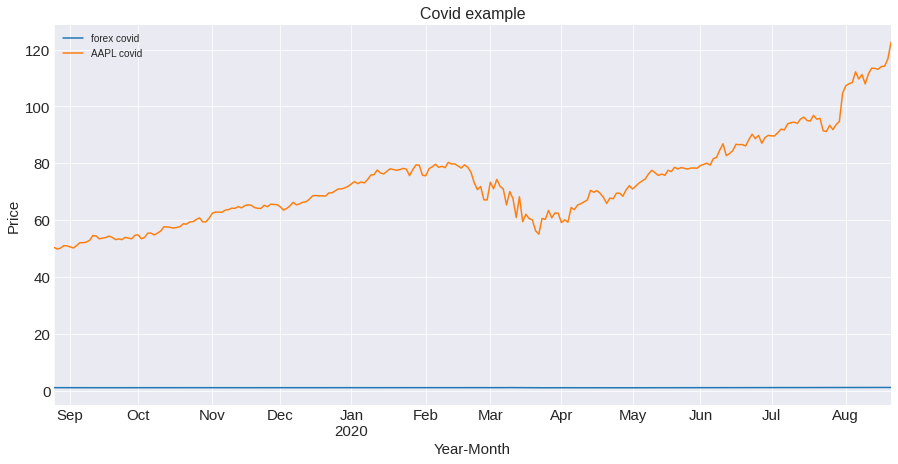

In [ ]:
plt.figure(figsize=(15, 7))
forex_data_covid['Adj Close'].plot(label="forex covid")
stocks_data_covid['Adj Close']["AAPL"].plot(label="AAPL covid")

# Set the title and axis label
plt.title('Covid example', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper left")

# Show the plot
plt.show()

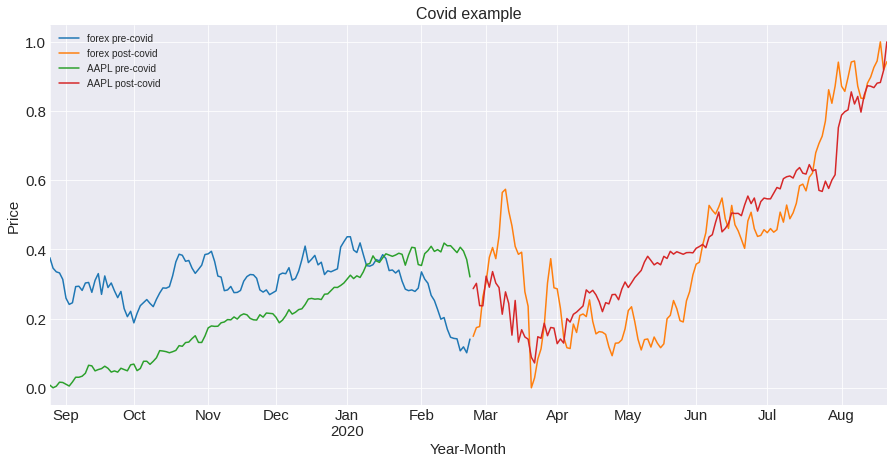

In [ ]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data_covid1['Adj Close'].plot(label="forex pre-covid")
forex_data_covid2['Adj Close'].plot(label="forex post-covid")
stocks_data_covid1['Adj Close']["AAPL"].plot(label="AAPL pre-covid")
stocks_data_covid2['Adj Close']["AAPL"].plot(label="AAPL post-covid")

# Set the title and axis label
plt.title('Covid example', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper left")

# Show the plot
plt.show()

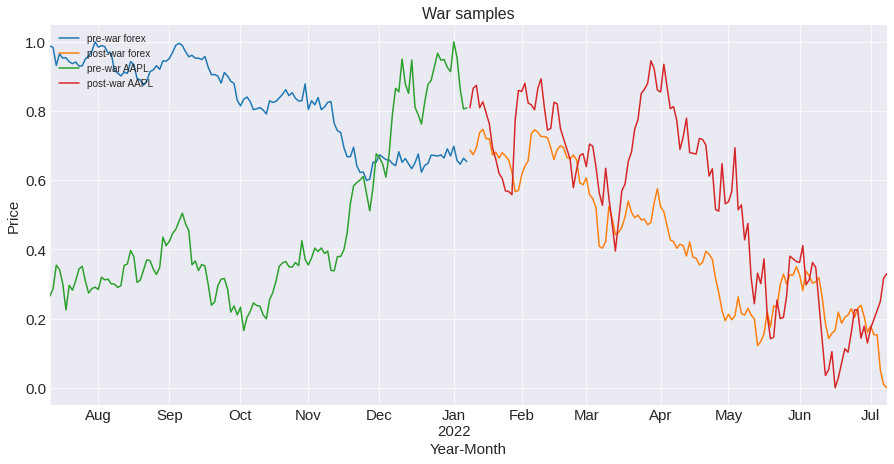

In [ ]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data_war1['Adj Close'].plot(label="pre-war forex")
forex_data_war2['Adj Close'].plot(label="post-war forex")
stocks_data_war1['Adj Close']["AAPL"].plot(label="pre-war AAPL")
stocks_data_war2['Adj Close']["AAPL"].plot(label="post-war AAPL")

# Set the title and axis label
plt.title('War samples', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper left")

# Show the plot
plt.show()

# Correlations

In [ ]:
df_covid1 = pd.concat([stocks_data_covid1["Adj Close"], index_data_covid1["Adj Close"], forex_data_covid1["Adj Close"]],  axis=1, ignore_index=False, sort=False, join="inner")
covid1_filter = [e for e in df_covid1.columns if 'Adj Close' in e]
covid1_corr = df_covid1.corr()[covid1_filter]["Adj Close"]
covid1_corr_z = np.arctanh(covid1_corr)[0:-1]

df_covid2 = pd.concat([stocks_data_covid2["Adj Close"], index_data_covid2["Adj Close"], forex_data_covid2["Adj Close"]],  axis=1, ignore_index=False, sort=False, join="inner")
covid2_filter = [e for e in df_covid2.columns if 'Adj Close' in e]
covid2_corr = df_covid2.corr()[covid2_filter]["Adj Close"]
covid2_corr_z = np.arctanh(covid2_corr)[0:-1]

covid_corr = pd.concat({"covid1":covid1_corr, "covid2":covid2_corr}, axis=1)[0:-1]

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


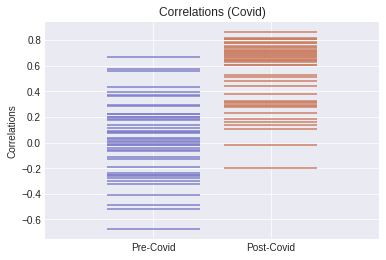

In [ ]:
plt.eventplot([covid1_corr[0:-1], covid2_corr[0:-1]], 
              orientation = 'vertical',
              linelengths = 0.8, 
              color = [(0.5,0.5,0.8), (0.8,0.5,0.4)])
plt.xticks([0, 1], ["Pre-Covid", "Post-Covid"])
plt.ylabel("Correlations")
plt.title("Correlations (Covid)")
plt.show()

In [ ]:
covid1_corr.index[np.argmax(covid1_corr[0:-1])]

'SHEL'

In [ ]:
covid2_corr.index[np.argmax(covid2_corr[0:-1])]

'AAPL'

In [ ]:
covid2_corr.index[np.argmax(np.abs(covid1_corr[0:-1] - covid2_corr[0:-1]))]

'HD'

In [ ]:
df_war1 = pd.concat([stocks_data_war1["Adj Close"], index_data_war1["Adj Close"], forex_data_war1["Adj Close"]],  axis=1, ignore_index=False, sort=False, join="inner")
war1_filter = [e for e in df_war1.columns if 'Adj Close' in e]
war1_corr = df_war1.corr()[war1_filter]["Adj Close"]

df_war2 = pd.concat([stocks_data_war2["Adj Close"], index_data_war2["Adj Close"], forex_data_war2["Adj Close"]],  axis=1, ignore_index=False, sort=False, join="inner")
war2_filter = [e for e in df_war2.columns if 'Adj Close' in e]
war2_corr = df_war2.corr()[war2_filter]["Adj Close"]

war_corr = pd.concat({"war1":war1_corr, "war2":war2_corr}, axis=1)[0:-1]

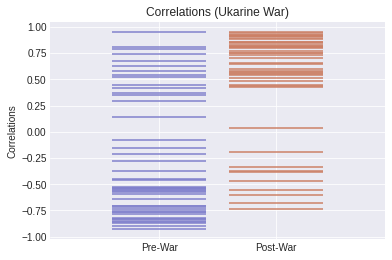

In [ ]:
plt.eventplot([war1_corr[0:-1], war2_corr[0:-1]], 
              orientation = 'vertical',
              linelengths = 0.8, 
              color = [(0.5,0.5,0.8), (0.8,0.5,0.4)])
plt.xticks([0, 1], ["Pre-War", "Post-War"])
plt.ylabel("Correlations")
plt.title("Correlations (Ukarine War)")
plt.show()

In [ ]:
war1_corr.index[np.argmax(war1_corr[0:-6])]

'PYPL'

In [ ]:
war2_corr.index[np.argmax(war2_corr[0:-1])]

'BAC'

In [ ]:
war2_corr.index[np.argmax(np.abs(war1_corr[0:-1] - war2_corr[0:-1]))]

'HD'

# Naive Model

In [ ]:
df_covid1.shift(-3).iloc[:-1, : ]

,AAPL,AMC,AMT,APD,BA,BAC,BBY,BXP,CE,COP,...,UNH,V,XOM,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^IXIC,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-26,0.016261,0.913612,0.521986,0.371206,0.916941,0.504926,0.177785,0.704633,0.761675,0.665918,...,0.251948,0.578387,0.872116,0.709004,0.719373,0.817100,0.635307,0.592519,0.249986,0.332049
2019-08-27,0.015356,0.894578,0.519678,0.383176,0.921584,0.515122,0.180227,0.709156,0.785254,0.663417,...,0.277570,0.573890,0.873323,0.712748,0.732320,0.825643,0.654083,0.594140,0.247625,0.313520
2019-08-28,0.005163,0.923629,0.599948,0.380264,0.888326,0.489067,0.173513,0.714364,0.760796,0.660233,...,0.251948,0.553070,0.875253,0.686719,0.726205,0.848398,0.648768,0.576731,0.227693,0.241125
2019-08-29,0.016865,0.954684,0.633840,0.395307,0.895583,0.513989,0.184499,0.726974,0.791845,0.688883,...,0.222461,0.586098,0.892867,0.708385,0.754214,0.864476,0.670121,0.603901,0.250770,0.245789
2019-08-30,0.030578,0.985738,0.578018,0.372257,0.908549,0.560169,0.212423,0.725603,0.847645,0.692066,...,0.244140,0.624138,0.916513,0.742390,0.780228,0.849517,0.689147,0.636856,0.282212,0.292616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-14,0.395177,0.591354,0.724543,0.642783,0.839608,0.954714,0.630456,0.991797,0.736879,0.835433,...,0.813665,0.976022,0.703734,0.969758,0.979231,0.911217,0.976624,0.979366,0.649341,0.118366
2020-02-18,0.370739,0.560051,0.718933,0.639270,0.819076,0.926625,0.604634,0.975946,0.723260,0.825282,...,0.808312,0.941987,0.685652,0.948993,0.965405,0.899019,0.960789,0.948774,0.610164,0.101241
2020-02-19,0.320614,0.517269,0.698822,0.562139,0.775646,0.833186,0.531033,0.956063,0.663605,0.777754,...,0.627577,0.812815,0.617037,0.854864,0.864467,0.806841,0.859039,0.852323,0.530340,0.140801


In [ ]:
def my_model(df, maxlags = 3, thresh = 0.05):
  gs = []
  filter = [e for e in df.columns if 'Adj Close' in e]
  base = df.shift(maxlags).iloc[:-maxlags, : ]
  base_corr = base.corr()[filter]["Adj Close"]
  base_z = np.abs(np.arctanh(base_corr)[0:-1])
  base_t, base_p = stats.ttest_ind(a=base_z, b=base_z, equal_var=False)
  res = 0
  gs.append(base_z)
  for lag in range(1, maxlags):
    temp = copy.deepcopy(df)
    temp["Adj Close"] = temp["Adj Close"].shift(-lag)
    temp_corr = temp.iloc[:-maxlags, :].corr()[filter]["Adj Close"]
    temp_z = np.abs(np.arctanh(temp_corr)[0:-1])
    gs.append(temp_z)
    t, p = stats.ttest_ind(a=base_z, b=temp_z, equal_var=False)
    print(lag, t, p)
    if t < 0 and p <= thresh and t< base_t:
      # base_z = temp_z
      base_t, base_p = t, p
      res = lag
  return res, base_t, base_p, gs


maxlags = 30

In [ ]:
res, _, _, gs_covid1 = my_model(df_covid1, maxlags = maxlags, thresh = 0.05)
print(res)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


1 -5.791309620841217 1.1236095537846143e-07
2 -5.810405344257964 1.0562574291457464e-07
3 -6.052787260905842 3.7609671148236366e-08
4 -6.192010648999875 2.1021606402553607e-08
5 -6.305775527986094 1.2531255688319724e-08
6 -6.065175217803644 3.3878861000701867e-08
7 -5.478159236628464 4.072730826371995e-07
8 -5.047216863701148 2.4022108512072606e-06
9 -4.94385695516103 3.6291038818026765e-06
10 -4.689804298244306 9.806826685854338e-06
11 -4.130497508794852 8.103489019036604e-05
12 -3.487099423691863 0.0007574437680463227
13 -2.9965526434158094 0.003531151933599225
14 -2.673421238758697 0.008961752667163718
15 -2.526626383424498 0.013379997418777122
16 -2.3008368718681025 0.0238843835991133
17 -2.1480307754840817 0.03453863922530582
18 -1.7146715448829668 0.09001030743470297
19 -1.2482605691482611 0.21525035611056506
20 -0.8675118361047587 0.3879958293097737
21 -0.48532416893112695 0.6286430061127031
22 -0.22332908902872317 0.8237896545137651
23 0.18682722900465842 0.8522166026261652
24 

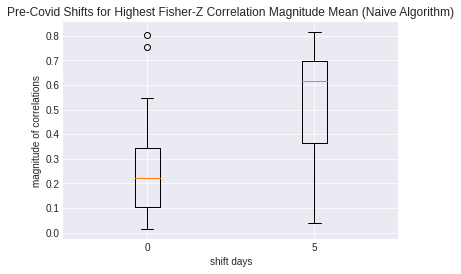

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([gs_covid1[0], gs_covid1[5]])
plt.xticks([1, 2], ["0", str(res)])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Pre-Covid Shifts for Highest Fisher-Z Correlation Magnitude Mean (Naive Algorithm)")
plt.show()

In [ ]:
res, _, _, gs_covid2 = my_model(df_covid2, maxlags = maxlags, thresh = 0.05)

1 -10.059492904096926 2.1493246892099369e-16
2 -11.723314457590769 1.0724617175152737e-19
3 -12.118824168153608 2.7912330713358676e-20
4 -12.469695975361404 8.484308465413584e-21
5 -12.039771306559302 5.713820549328598e-20
6 -11.725844004063044 3.1884121249816225e-19
7 -11.056645340046005 7.850988743836847e-18
8 -10.376054435098778 1.9978807936886332e-16
9 -10.228309480684857 5.599405581733398e-16
10 -9.51858792865362 1.8543257631861978e-14
11 -8.90198403176332 3.880207147673687e-13
12 -8.090022815510789 1.4338216830029878e-11
13 -7.86986681425536 4.525265288186499e-11
14 -7.674964123446088 1.1273511328260293e-10
15 -7.55266603140489 2.026182486178993e-10
16 -7.510544516898436 2.7083796165584573e-10
17 -7.427536826578542 3.7974623977999147e-10
18 -7.411113441868279 4.3316260906093036e-10
19 -7.495087203865834 3.1607445620701716e-10
20 -7.64572265274024 1.8000079655621942e-10
21 -7.750089893682045 1.193146408319391e-10
22 -7.971748817775999 5.1991214864759146e-11
23 -8.151704486209383 2

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


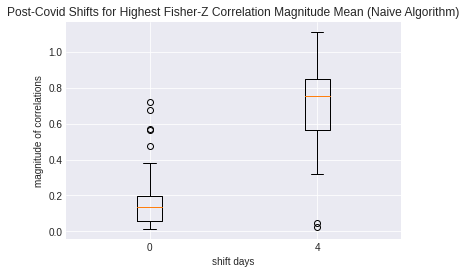

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([gs_covid2[0], gs_covid2[res]])
plt.xticks([1, 2], ["0", str(res)])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Post-Covid Shifts for Highest Fisher-Z Correlation Magnitude Mean (Naive Algorithm)")
plt.show()

In [ ]:
res, _, _, gs_war1 = my_model(df_war1, maxlags = maxlags, thresh = 0.05)

1 -1.9245277076263054 0.057590028871441774
2 -2.0930118131807403 0.039318436544508104
3 -2.2246047129148416 0.02877612721091399
4 -2.3602332972477473 0.020587956493546264
5 -2.484848725450607 0.014971385238869896
6 -2.6456573985893233 0.009762412798214468
7 -2.750661443240354 0.00732016675401801
8 -2.8909280808046227 0.004923447130883832
9 -3.0195736739325962 0.0033867974984759324
10 -3.1676041297070396 0.0021743479486420704
11 -3.261876783842988 0.0016301168345033094
12 -3.320407963852147 0.0013588887720969818
13 -3.328344391351453 0.0013264716687799033
14 -3.34405775371493 0.0012626721535754148
15 -3.3399625708366667 0.0012783155524027073
16 -3.321248459980648 0.0013529062487335495
17 -3.3756315683596085 0.0011398270345209778
18 -3.3961320083773603 0.0010680595731673835
19 -3.431450100449698 0.0009537994307231821
20 -3.4091038116716113 0.0010226870893170795
21 -3.3401804663473826 0.0012706683862537343
22 -3.236237379158286 0.0017552032994019198
23 -3.176014572572222 0.002113710547082

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


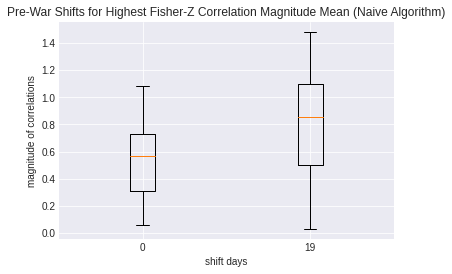

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([gs_war1[0], gs_war1[res]])
plt.xticks([1, 2], ["0", str(res)])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Pre-War Shifts for Highest Fisher-Z Correlation Magnitude Mean (Naive Algorithm)")
plt.show()

In [ ]:
res, _, _, gs_war2 =my_model(df_war2, maxlags = maxlags, thresh = 0.05)

1 -1.4987315455530503 0.13751163103103256
2 -1.3647205929031265 0.17577897498904088
3 -1.0243812923632127 0.3084058493546615
4 -0.7114176975637535 0.4786654535173879
5 -0.47790449212170927 0.6338808704151759
6 -0.17439879894751176 0.8619488014209301
7 0.15507049393645594 0.8771219134515851
8 0.3486360141088514 0.728204353800167
9 0.48918362391372155 0.6259481966971563
10 0.6484161248939012 0.5184474362703374
11 0.816742164734656 0.4163569620250508
12 0.8173709615197315 0.4159998939292747
13 0.7710616531561738 0.4428000811501671
14 0.543310134452861 0.5883152748753477
15 0.32264034320361223 0.7477372698118411
16 0.27434731225591547 0.7844602493654418
17 0.31994537097803605 0.7497651443114242
18 0.30615154752861845 0.7602051943753041
19 0.2435543703414345 0.8081339923401021
20 0.26386665287134264 0.7924882659652135
21 0.2400024883253638 0.8108754749316426
22 0.3357917621277319 0.7378116764323412
23 0.4065128028822404 0.6853344221192758
24 0.38528576067558834 0.7009384554752283
25 0.27202

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


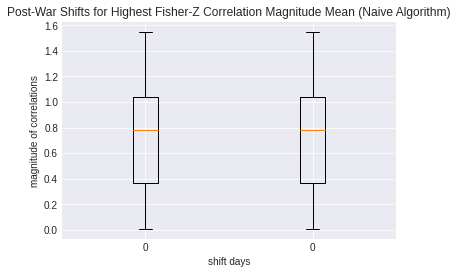

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([gs_war2[0], gs_war2[res]])
plt.xticks([1, 2], ["0", str(res)])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Post-War Shifts for Highest Fisher-Z Correlation Magnitude Mean (Naive Algorithm)")
plt.show()

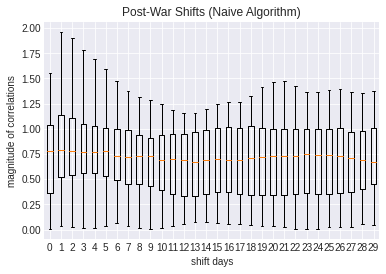

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(gs_war2)
plt.xticks(list(range(1,31)), list(range(0,30)))
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Post-War Shifts (Naive Algorithm)")
plt.show()

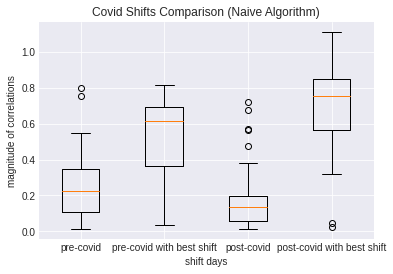

In [ ]:
# covid
fig, ax = plt.subplots()
ax.boxplot([gs_covid1[0], gs_covid1[5], gs_covid2[0], gs_covid2[4]])
plt.xticks([1, 2, 3, 4], ["pre-covid", "pre-covid with best shift", "post-covid", "post-covid with best shift"])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("Covid Shifts Comparison (Naive Algorithm)")
plt.show()

In [ ]:
# covid t-test
base_t, base_p = stats.ttest_ind(a=gs_covid1[0], b=gs_covid2[0], equal_var=False)
best_t, best_p = stats.ttest_ind(a=gs_covid1[5], b=gs_covid2[4], equal_var=False)
print(base_t, base_p)
print(best_t, best_p)

1.8809716676036636 0.06321175348980117
-3.891505459952001 0.00019075444289941496


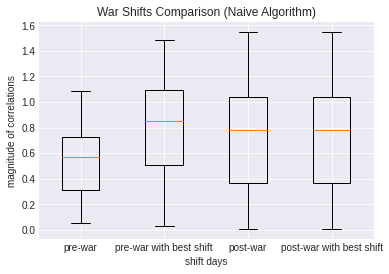

In [ ]:
# war
fig, ax = plt.subplots()
ax.boxplot([gs_war1[0], gs_war1[19], gs_war2[0], gs_war2[0]])
plt.xticks([1, 2, 3, 4], ["pre-war", "pre-war with best shift", "post-war", "post-war with best shift"])
plt.xlabel("shift days")
plt.ylabel("magnitude of correlations")
plt.title("War Shifts Comparison (Naive Algorithm)")
plt.show()

In [ ]:
# war t-test
base_t, base_p = stats.ttest_ind(a=gs_war1[0], b=gs_war2[0], equal_var=False)
best_t, best_p = stats.ttest_ind(a=gs_war1[19], b=gs_war2[0], equal_var=False)
print(base_t, base_p)
print(best_t, best_p)

-2.4045000708113853 0.018571643383306934
0.7992964316897242 0.42622710712160483


# Tests

In [ ]:
df_covid1 = df_covid1.interpolate(method='spline', order=2)
df_covid1 = df_covid1.replace(np.nan, 0)

df_covid2 = df_covid2.interpolate(method='spline', order=2)
df_covid2 = df_covid2.replace(np.nan, 0)

df_war1 = df_war1.interpolate(method='spline', order=2)
df_war1 = df_war1.replace(np.nan, 0)


df_war2 = df_war2.interpolate(method='spline', order=2)
df_war2 = df_war2.replace(np.nan, 0)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

granger_covid1 = grangers_causation_matrix(df_covid1, variables = df_covid1.columns)
granger_covid2 = grangers_causation_matrix(df_covid2, variables = df_covid2.columns)


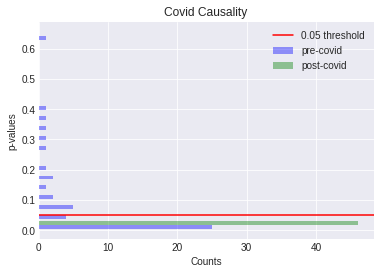

In [ ]:
from sklearn.base import platform
# print(granger_covid1.iloc[-1, :-1])
colors = ['b','g']

#plots the histogram
plt.hist([granger_covid1.iloc[-1, :-1],granger_covid2.iloc[-1, :-1]], label=['pre-covid', 'post-covid'], color=colors, orientation = 'horizontal', alpha=0.4, bins = 20)
plt.axhline(y=0.05, color='r', linestyle='-', label = "0.05 threshold")
plt.legend(loc='upper right')
plt.xlabel("Counts")
plt.ylabel("p-values")
plt.title("Covid Causality")
plt.show()


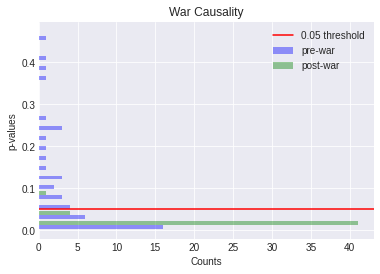

In [ ]:
granger_war1 = grangers_causation_matrix(df_war1, variables = df_war1.columns)
granger_war2 = grangers_causation_matrix(df_war2, variables = df_war2.columns)
#plots the histogram
plt.hist([granger_war1.iloc[-1, :-1],granger_war2.iloc[-1, :-1]], label=['pre-war', 'post-war'], color=colors, orientation = 'horizontal', alpha=0.4, bins = 20)
plt.axhline(y=0.05, color='r', linestyle='-', label = "0.05 threshold")
plt.legend(loc='upper right')
plt.xlabel("Counts")
plt.ylabel("p-values")
plt.title("War Causality")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_covid1.iteritems():
    adfuller_test(column, name=column.name)

In [ ]:
for name, column in df_covid2.iteritems():
    adfuller_test(column, name=column.name)

# Time shifts


In [ ]:
# df_covid1 = df_covid1.replace(np.nan, 0)
upsampled = df_covid1.resample("12H")
df_covid1 = upsampled.interpolate(method='spline', order=2)
df_covid1 = df_covid1.replace(np.nan, 0)
df_covid1

,AAPL,AMC,AMT,APD,BA,BAC,BBY,BXP,CE,COP,...,UNH,V,XOM,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^IXIC,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-26 00:00:00,7.812038e-03,0.914614,0.518419,0.357861,0.904216,0.473775,0.241262,0.690104,0.697819,0.644999,...,0.255435,0.532379,0.858121,0.666719,0.677381,0.000000,0.601488,0.552683,0.223105,0.376369
2019-08-26 12:00:00,-5.230482e-03,0.988569,0.563291,0.335629,0.959366,0.465777,0.164911,0.706234,0.785739,0.663941,...,0.107604,0.550525,0.869053,0.697588,0.710912,0.765322,0.636070,0.578610,0.235996,0.241249
2019-08-27 00:00:00,-1.571343e-07,0.869535,0.515481,0.380102,0.889392,0.456216,0.243856,0.679276,0.695183,0.636131,...,0.193656,0.542532,0.842196,0.655685,0.692688,0.781773,0.614949,0.544733,0.217087,0.345880
2019-08-27 12:00:00,-2.849942e-03,0.983813,0.558026,0.335366,0.958599,0.471809,0.168000,0.707356,0.790130,0.667303,...,0.113632,0.548690,0.871060,0.699194,0.713644,0.767399,0.639672,0.580329,0.236868,0.243611
2019-08-28 00:00:00,4.593351e-03,0.908603,0.519153,0.382124,0.907414,0.477739,0.261862,0.684758,0.729161,0.658187,...,0.227161,0.546259,0.854019,0.679244,0.684926,0.791137,0.609525,0.560926,0.223811,0.335289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-22 00:00:00,4.284684e-01,0.481007,0.781015,0.626019,0.786472,0.926179,0.641620,0.962956,0.673534,0.864085,...,0.805892,0.993034,0.721224,0.984278,0.962120,0.921930,0.939579,0.985764,0.652544,0.223017
2020-02-22 12:00:00,4.296944e-01,0.480565,0.784888,0.627777,0.785891,0.925714,0.642730,0.963827,0.670693,0.863510,...,0.806759,0.996435,0.719385,0.985072,0.962149,0.921759,0.939461,0.987175,0.654435,0.221725
2020-02-23 00:00:00,4.309206e-01,0.480129,0.788779,0.629539,0.785310,0.925239,0.643838,0.964698,0.667837,0.862929,...,0.807621,0.999848,0.717539,0.985865,0.962173,0.921584,0.939337,0.988587,0.656330,0.220425


In [ ]:
from statsmodels.tsa.api import ARDL
model_1 = ARDL(df_covid1.iloc[:, -1], 0, df_covid1.iloc[:, 0:-1],4)
model_1 = model_1.fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                              ARDL Model Results                                                                                             
=============================================================================================================================================================================================================
Dep. Variable:                                                                                                                                             Adj Close   No. Observations:                  365
Model:             ARDL(0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)   Log Likelihood                1379.933
Method:                                                                                                                                              Conditional MLE   S.D. of innovations              0.006
Date:                                                                                                                                               Sun, 04 Dec 2022   AIC                          -2295.867
Time:                                                                                                                                                       19:37:16   BIC                          -1391.091
Sample:                                                                                                                                                   08-28-2019   HQIC                         -1936.297
                                                                                                                                                        - 02-24-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6791      0.490      1.385      0.168      -0.291       1.649
AAPL.L0        1.0502      0.303      3.464      0.001       0.451       1.650
AAPL.L1       -0.0415      0.228     -0.182      0.856      -0.493       0.410
AAPL.L2       -0.9312      0.323     -2.879      0.005      -1.571      -0.291
AAPL.L3        0.0411      0.223      0.185      0.854      -0.400       0.482
AAPL.L4       -0.2931      0.349     -0.839      0.403      -0.984       0.398
AMC.L0         0.0490      0.117      0.420      0.675      -0.182       0.280
AMC.L1         0.0069      0.079      0.088      0.930      -0.149       0.162
AMC.L2         0.3693      0.109      3.388      0.001       0.154       0.585
AMC.L3         0.0234      0.073      0.323      0.747      -0.120       0.167
AMC.L4         0.1984      0.098      2.030      0.044       0.005       0.392
AMT.L0        -0.0805      0.089     -0.904      0.368      -0.257       0.096
AMT.L1        -0.0137      0.064     -0.213      0.832      -0.141       0.113
AMT.L2        -0.1243      0.107     -1.156      0.250      -0.337       0.088
AMT.L3         0.0140      0.057      0.248      0.805      -0.098       0.126
AMT.L4         0.1272      0.102      1.246      0.215      -0.075       0.329
APD.L0        -0.1687      0.145     -1.167      0.245      -0.455       0.117
APD.L1         0.0662      0.100      0.664      0.508      -0.131       0.264
APD.L2         0.3460      0.139      2.490      0.014       0.071       0.621
APD.L3         0.0752      0.095      0.790      0.431      -0.113       0.264
APD.L4         0.4585      0.124      3.697      0.000       0.213       0.704
BA.L0          0.0438      0.192      0.228      0.820      -0.337       0.425
BA.L1         -0.0061      0.130     -0.047      0.963      -0.263       0.251
BA.L2          0.5144      0.167      3.080 

In [ ]:
upsampled = df_covid2.resample("12H")
df_covid2 = upsampled.interpolate(method='spline', order=2)
df_covid2 = df_covid2.replace(np.nan, 0)
model_2 = ARDL(df_covid2.iloc[:, -1], 0, df_covid2.iloc[:, 0:-1],4)
model_2 = model_2.fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                              ARDL Model Results                                                                                             
=============================================================================================================================================================================================================
Dep. Variable:                                                                                                                                             Adj Close   No. Observations:                  357
Model:             ARDL(0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)   Log Likelihood                1151.305
Method:                                                                                                                                              Conditional MLE   S.D. of innovations              0.010
Date:                                                                                                                                               Sun, 04 Dec 2022   AIC                          -1838.611
Time:                                                                                                                                                       19:38:06   BIC                           -938.976
Sample:                                                                                                                                                   02-27-2020   HQIC                         -1480.787
                                                                                                                                                        - 08-21-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1943      0.233     -0.834      0.406      -0.655       0.267
AAPL.L0        0.8464      0.289      2.930      0.004       0.275       1.418
AAPL.L1        0.0636      0.225      0.282      0.778      -0.383       0.510
AAPL.L2        0.2497      0.368      0.678      0.499      -0.479       0.978
AAPL.L3       -0.0596      0.232     -0.257      0.798      -0.519       0.399
AAPL.L4       -0.1971      0.326     -0.604      0.547      -0.843       0.449
AMC.L0        -0.3255      0.115     -2.821      0.006      -0.554      -0.097
AMC.L1         0.0105      0.077      0.137      0.891      -0.141       0.162
AMC.L2        -0.0849      0.106     -0.802      0.424      -0.295       0.125
AMC.L3        -0.0058      0.079     -0.073      0.942      -0.162       0.150
AMC.L4         0.0418      0.112      0.373      0.710      -0.180       0.264
AMT.L0        -0.1872      0.099     -1.897      0.060      -0.382       0.008
AMT.L1        -0.0238      0.073     -0.328      0.743      -0.167       0.120
AMT.L2        -0.2634      0.113     -2.333      0.021      -0.487      -0.040
AMT.L3         0.0027      0.082      0.033      0.974      -0.159       0.165
AMT.L4         0.1316      0.121      1.086      0.280      -0.108       0.371
APD.L0         0.5611      0.100      5.616      0.000       0.363       0.759
APD.L1        -0.0186      0.078     -0.237      0.813      -0.174       0.136
APD.L2         0.2461      0.123      2.001      0.048       0.003       0.489
APD.L3        -0.0401      0.081     -0.492      0.624      -0.201       0.121
APD.L4         0.1679      0.113      1.492      0.138      -0.055       0.391
BA.L0          0.6926      0.411      1.685      0.094      -0.121       1.506
BA.L1          0.1067      0.267      0.400      0.690      -0.421       0.635
BA.L2          0.5056      0.434      1.166 

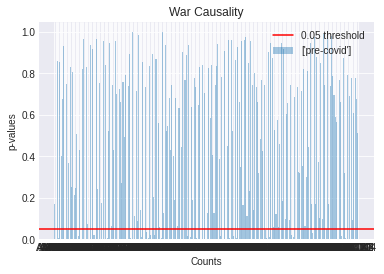

In [ ]:
#plots the histogram
plt.bar(list(dict(model_1.params).keys()), height= model_1.pvalues, label=['pre-covid'], alpha=0.4)
plt.axhline(y=0.05, color='r', linestyle='-', label = "0.05 threshold")
plt.legend(loc='upper right')
plt.xlabel("Counts")
plt.ylabel("p-values")
plt.title("War Causality")
plt.show()

In [ ]:
def helper(pvalues, params, hold = 0.05):
  names = list(dict(params).keys())
  res_names = []
  res = []
  store ={"0":0, "1":0, "2":0}
  for i in range(0, len(pvalues), 1):
    if pvalues[i]<hold:
      res_names.append(names[i])
      res.append(params[i])
  
  for i in res_names:
    if i[-1] == "0":
      store["0"]+=1
    elif i[-1] == "2":
      store["1"]+=1
    else:
      store["2"]+=1

  return res_names, res, store

temp1, _ , store1 = helper(model_1.pvalues, model_1.params)
temp2, _ , store2 = helper(model_2.pvalues, model_2.params)

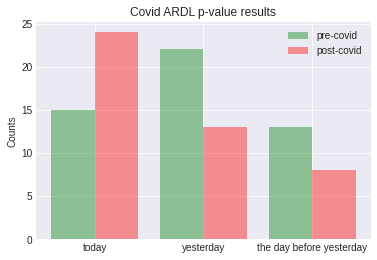

In [ ]:
#plots the histogram
colors = ['C0', 'C1']
x = ["today", "yesterday", "the day before yesterday"]
_X = np.arange(len(x))
plt.bar(_X - 0.2, height= store1.values(), width= 0.4, label='pre-covid', color = "g", alpha=0.4)
plt.bar(_X + 0.2, height= store2.values(), width= 0.4, label='post-covid', color = "r", alpha=0.4)
plt.xticks(_X, x)
plt.legend(loc='upper right')
plt.ylabel("Counts")
plt.title("Covid ARDL p-value results")
plt.show()


In [ ]:
upsampled = df_war1.resample("12H")
df_war1 = upsampled.interpolate(method='spline', order=2)
df_war1 = df_war1.replace(np.nan, 0)
model_1 = ARDL(df_war1.iloc[:, -1], 0, df_war1.iloc[:, 0:-1],4)
model_1 = model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                              ARDL Model Results                                                                                             
=============================================================================================================================================================================================================
Dep. Variable:                                                                                                                                             Adj Close   No. Observations:                  359
Model:             ARDL(0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)   Log Likelihood                1390.102
Method:                                                                                                                                              Conditional MLE   S.D. of innovations              0.005
Date:                                                                                                                                               Sun, 04 Dec 2022   AIC                          -2316.203
Time:                                                                                                                                                       20:01:06   BIC                          -1415.273
Sample:                                                                                                                                                   07-14-2021   HQIC                         -1957.939
                                                                                                                                                        - 01-07-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1212      0.469      2.392      0.018       0.194       2.048
AAPL.L0       -0.0251      0.070     -0.356      0.722      -0.164       0.114
AAPL.L1       -0.0032      0.057     -0.055      0.956      -0.117       0.111
AAPL.L2       -0.0127      0.095     -0.133      0.894      -0.201       0.176
AAPL.L3        0.0050      0.054      0.093      0.926      -0.102       0.112
AAPL.L4        0.0556      0.071      0.785      0.434      -0.085       0.196
AMC.L0        -0.0206      0.042     -0.485      0.629      -0.105       0.063
AMC.L1        -0.0205      0.031     -0.655      0.514      -0.082       0.041
AMC.L2        -0.1496      0.047     -3.199      0.002      -0.242      -0.057
AMC.L3        -0.0025      0.032     -0.079      0.938      -0.065       0.060
AMC.L4         0.0446      0.044      1.006      0.316      -0.043       0.132
AMT.L0         0.2705      0.060      4.505      0.000       0.152       0.389
AMT.L1        -0.0038      0.044     -0.086      0.931      -0.090       0.083
AMT.L2        -0.0674      0.056     -1.212      0.228      -0.177       0.043
AMT.L3        -0.0024      0.038     -0.062      0.950      -0.078       0.073
AMT.L4        -0.0216      0.055     -0.392      0.696      -0.131       0.088
APD.L0         0.0014      0.064      0.022      0.982      -0.126       0.129
APD.L1         0.0043      0.052      0.082      0.935      -0.099       0.108
APD.L2        -0.0410      0.083     -0.496      0.621      -0.205       0.123
APD.L3         0.0297      0.057      0.522      0.602      -0.083       0.142
APD.L4         0.1215      0.070      1.748      0.083      -0.016       0.259
BA.L0         -0.1021      0.123     -0.828      0.409      -0.346       0.142
BA.L1         -0.0197      0.094     -0.211      0.833      -0.205       0.165
BA.L2         -0.4849      0.134     -3.609 

In [ ]:
upsampled = df_war2.resample("12H")
df_war2 = upsampled.interpolate(method='spline', order=2)
df_war2 = df_war2.replace(np.nan, 0)
model_2 = ARDL(df_war2.iloc[:, -1], 0, df_war2.iloc[:, 0:-1],4)
model_2 = model_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                              ARDL Model Results                                                                                             
=============================================================================================================================================================================================================
Dep. Variable:                                                                                                                                             Adj Close   No. Observations:                  359
Model:             ARDL(0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)   Log Likelihood                1248.816
Method:                                                                                                                                              Conditional MLE   S.D. of innovations              0.007
Date:                                                                                                                                               Sun, 04 Dec 2022   AIC                          -2033.632
Time:                                                                                                                                                       20:01:31   BIC                          -1132.701
Sample:                                                                                                                                                   01-12-2022   HQIC                         -1675.367
                                                                                                                                                        - 07-08-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.297     -0.911      0.364      -0.859       0.317
AAPL.L0       -0.0753      0.102     -0.735      0.464      -0.278       0.127
AAPL.L1       -0.0166      0.074     -0.224      0.823      -0.163       0.130
AAPL.L2        0.1170      0.106      1.105      0.271      -0.093       0.327
AAPL.L3        0.0205      0.072      0.284      0.777      -0.122       0.163
AAPL.L4        0.4271      0.122      3.504      0.001       0.186       0.668
AMC.L0        -0.1328      0.087     -1.526      0.130      -0.305       0.039
AMC.L1         0.0033      0.065      0.050      0.960      -0.126       0.132
AMC.L2        -0.0225      0.111     -0.202      0.841      -0.243       0.198
AMC.L3        -0.0298      0.080     -0.373      0.710      -0.188       0.128
AMC.L4        -0.3062      0.132     -2.316      0.022      -0.568      -0.045
AMT.L0         0.2250      0.081      2.793      0.006       0.066       0.384
AMT.L1         0.0357      0.051      0.694      0.489      -0.066       0.138
AMT.L2        -0.0343      0.076     -0.450      0.654      -0.185       0.117
AMT.L3         0.0346      0.055      0.632      0.529      -0.074       0.143
AMT.L4         0.0343      0.069      0.500      0.618      -0.101       0.170
APD.L0         0.3650      0.094      3.884      0.000       0.179       0.551
APD.L1         0.0202      0.076      0.265      0.791      -0.130       0.171
APD.L2         0.0090      0.104      0.087      0.931      -0.197       0.215
APD.L3        -0.0447      0.079     -0.568      0.571      -0.200       0.111
APD.L4        -0.0186      0.091     -0.204      0.839      -0.199       0.162
BA.L0          0.4658      0.140      3.330      0.001       0.189       0.742
BA.L1         -0.0733      0.096     -0.762      0.448      -0.264       0.117
BA.L2          0.4062      0.135      3.005 

In [ ]:

temp1, _ , store1 = helper(model_1.pvalues, model_1.params)
temp2, _ , store2 = helper(model_2.pvalues, model_2.params)

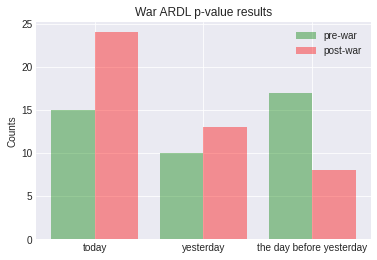

In [ ]:
#plots the histogram
colors = ['C0', 'C1']
x = ["today", "yesterday", "the day before yesterday"]
_X = np.arange(len(x))
plt.bar(_X - 0.2, height= store1.values(), width= 0.4, label='pre-war', color = "g", alpha=0.4)
plt.bar(_X + 0.2, height= store2.values(), width= 0.4, label='post-war', color = "r", alpha=0.4)
plt.xticks(_X, x)
plt.legend(loc='upper right')
plt.ylabel("Counts")
plt.title("War ARDL p-value results")
plt.show()
